# Fraktal Library Exploration

This notebook is for exploring and testing the `fraktal` library.

## Import Fraktal Library

Import the main modules from the fraktal package.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Import fraktal engines
from fraktal.engines.mandelbrot import mandelbrot_set
from fraktal.engines.palette import simple_palette, hot_palette, cool_palette
from fraktal.engines.seed import f_numba
from fraktal.engines.orbit import truncated_orbit_numba

## Generate a Simple Mandelbrot Set

Generate and visualize a basic Mandelbrot set.

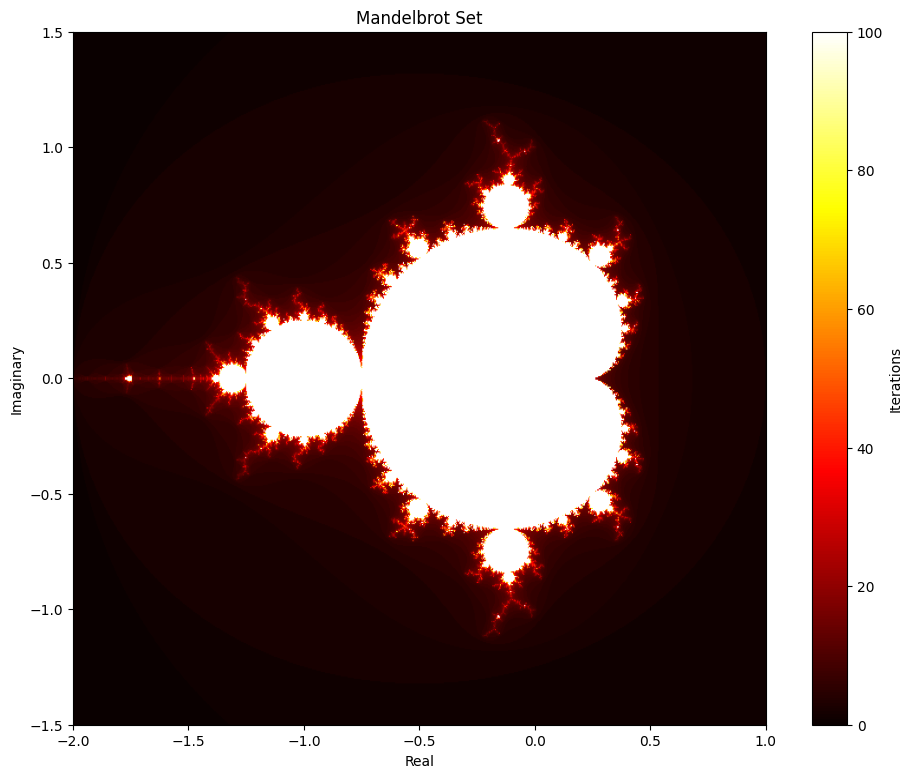

In [4]:
# Set parameters
xmin, xmax = -2.0, 1.0
ymin, ymax = -1.5, 1.5
width, height = 800, 600
max_iter = 100

# Generate Mandelbrot set
data = mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter)

# Display using matplotlib
plt.figure(figsize=(12, 9))
plt.imshow(data, cmap='hot', extent=[xmin, xmax, ymin, ymax], origin='lower')
plt.colorbar(label='Iterations')
plt.title('Mandelbrot Set')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()

## Test Seed Function

Test the seed function $f(z) = z^p + c$.

In [ ]:
# Test seed function
z = 0.5 + 0.5j
c = -0.4 + 0.6j
p = 2

result = f_numba(z, c, p)
print(f"f_numba({z}, c={c}, p={p}) = {result}")

## Test Orbit Calculation

Calculate the truncated orbit for a given complex parameter.

In [6]:
# Calculate orbit
c = -0.4 + 0.6j
max_iter = 20
bailout = 2.0

orbit, escape_time = truncated_orbit_numba(0, c, max_iter, bailout, p=2)
print(f"Complex parameter c = {c}")
print(f"Escape time: {escape_time}")
print(f"Orbit length: {len(orbit)}")
print(f"First few orbit points: {orbit[:5]}")

Complex parameter c = (-0.4+0.6j)
Escape time: 20
Orbit length: 21
First few orbit points: [ 0.        +0.j        -0.4       +0.6j       -0.6       +0.12j
 -0.0544    +0.456j     -0.60497665+0.5503872j]


## Scratch/Experiment Area

Use this space for your own experiments with the fraktal library.

C:\Users\hadri\AppData\Local\Temp\ipykernel_2988\3123626073.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


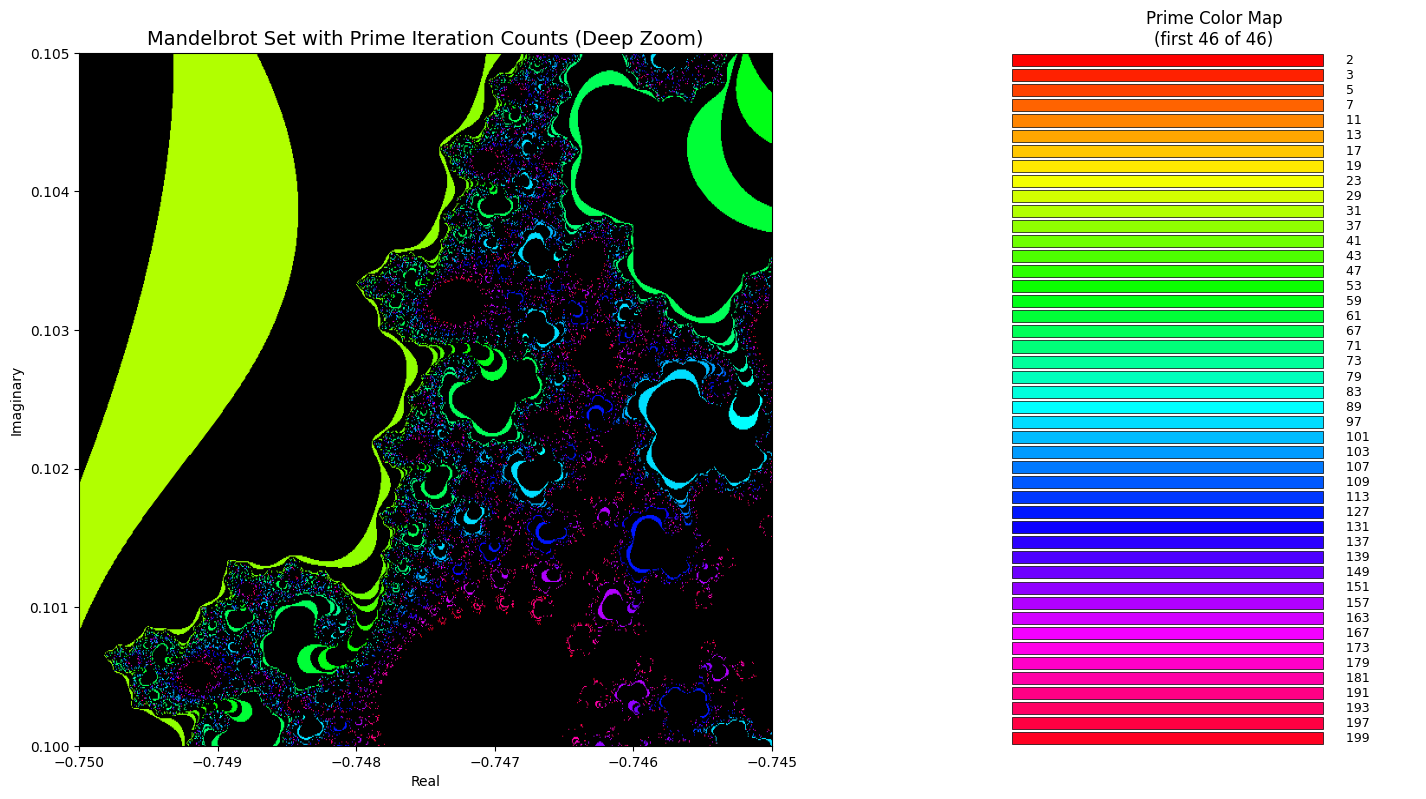

In [43]:
# Your code here
import colorsys

def is_prime(n):
    if n <= 1:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True

def prime_to_color(prime_num, primes, total_primes):
    """Map a prime number to a unique RGB color using hue variation."""
    # Generate list of primes up to max_prime
    
    if prime_num not in primes:
        return (0, 0, 0)  # Black for non-primes
    
    # Get index of this prime in the list
    prime_index = primes.index(prime_num)
    
    # Map to hue (0-360 degrees)
    hue = (prime_index / total_primes) * 360
    
    # Convert HSV to RGB (with S=1, V=1 for vibrant colors)
    r, g, b = colorsys.hsv_to_rgb(hue / 360, 1.0, 1.0)
    
    return (int(r * 255), int(g * 255), int(b * 255))

# Create a color map for all primes up to max_iter
max_iter = 200
max_prime = max_iter
primes = [n for n in range(2, max_prime + 1) if is_prime(n)]
total_primes = len(primes)
prime_color_map = {}
for n in range(max_iter + 1):
    if is_prime(n):
        prime_color_map[n] = prime_to_color(n, primes, total_primes)

# Zoom parameters - Deep zoom into intricate fractal details
# Even deeper zoom to see fine-grained prime distribution
xmin, xmax, ymin, ymax = -0.75, -0.745, 0.1, 0.105
        
# Generate Mandelbrot set for zoomed region
mandel_set = mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter)

# Create a new RGB array (height, width, 3) for colors
prime_mandel_set = np.zeros((height, width, 3), dtype=np.uint8)

for i in range(height):
    for j in range(width):
        iter_count = mandel_set[i, j]
        rgb = prime_color_map.get(iter_count, (0, 0, 0))
        prime_mandel_set[i, j] = rgb

# Create figure with two subplots: Mandelbrot set and color legend
fig = plt.figure(figsize=(18, 9))
gs = fig.add_gridspec(1, 2, width_ratios=[2, 1], wspace=0.3)

# Left subplot: Mandelbrot set
ax1 = fig.add_subplot(gs[0])
ax1.imshow(prime_mandel_set, extent=[xmin, xmax, ymin, ymax], origin='lower')
ax1.set_title('Mandelbrot Set with Prime Iteration Counts (Deep Zoom)', fontsize=14)
ax1.set_xlabel('Real')
ax1.set_ylabel('Imaginary')

# Right subplot: Color legend
ax2 = fig.add_subplot(gs[1])
display_primes = sorted([p for p in prime_color_map.keys()])[:50]
num_display = len(display_primes)

for idx, prime in enumerate(display_primes):
    color = np.array(prime_color_map[prime]) / 255.0
    ax2.barh(idx, 1, color=color, edgecolor='black', linewidth=0.5)
    ax2.text(1.05, idx, f'  {prime}', va='center', fontsize=9)

ax2.set_ylim(-0.5, num_display - 0.5)
ax2.set_xlim(0, 1.3)
ax2.set_yticks([])
ax2.set_xticks([])
ax2.set_title(f'Prime Color Map\n(first {num_display} of {total_primes})', fontsize=12)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.invert_yaxis()

plt.tight_layout()
plt.show()